# Projections & Least Squares

In [3]:
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.9 MB 1.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/8.9 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.9 MB 949.8 kB/s eta 0:00:09
   ----- ---------------------------------- 1.3/8.9 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.6/8.9 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.1/8.9 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.4/8.9 MB 1.3 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.9 MB 1.3 MB/s eta 0:00:05
   ----------- -----------------------

Theta (from Normal Equation):
 [[4.22215108]
 [2.96846751]]

Projection Matrix P:
 [[0.01069528 0.01221695 0.0111887  0.01065933 0.00955057]
 [0.01221695 0.01706895 0.01379029 0.01210233 0.00856696]
 [0.0111887  0.01379029 0.01203231 0.01112725 0.00923162]
 [0.01065933 0.01210233 0.01112725 0.01062524 0.00957381]
 [0.00955057 0.00856696 0.00923162 0.00957381 0.01029051]]

P^2 close to P: True



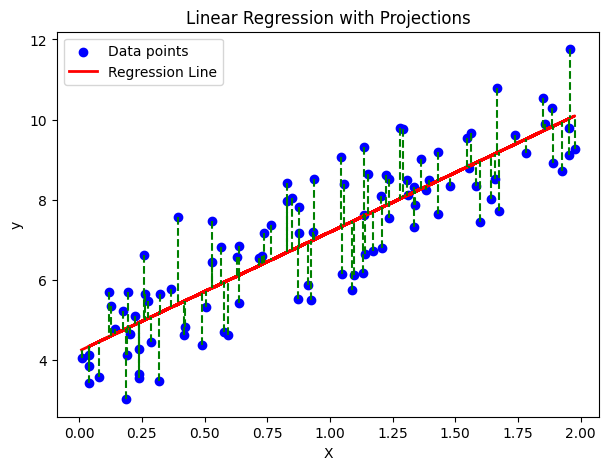

In [4]:
#Data Generation
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Add a column of ones for the bias term
X_b = np.c_[np.ones((100, 1)), X]  # shape = (100, 2)


#Mathematical Formula

# Normal Equation for Least Squares:
# θ = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Theta (from Normal Equation):\n", theta_best)
print()


#Predictions & Residuals

y_pred = X_b @ theta_best  # Predictions
residuals = y - y_pred     # Residuals


# Projection Matrix

# Projection matrix: P = X(X^TX)^(-1)X^T

P = X_b @ np.linalg.inv(X_b.T @ X_b) @ X_b.T
y_proj = P @ y  # Project y onto column space of X
print("Projection Matrix P:\n", P[:5, :5])  
print()

# Verify property: P^2 = P
print("P^2 close to P:", np.allclose(P @ P, P))
print()

# Visualization
plt.figure(figsize=(7,5))
plt.scatter(X, y, label="Data points", color="blue")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regression Line")
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='green', linestyle='--')  # residuals
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with Projections")
plt.show()


In [5]:
#Using sklearn for comparison 

lin_reg = LinearRegression() 
lin_reg.fit(X, y) 
print("Theta (from sklearn):", lin_reg.intercept_, lin_reg.coef_)

Theta (from sklearn): [4.22215108] [[2.96846751]]
